code to unzip the flower

import tarfile
from pathlib import Path

archive_path = Path("/home/student/HW4_Lemidahi/102flowers.tgz")
extract_to = Path("/home/student/HW4_Lemidahi")

with tarfile.open(archive_path, "r:gz") as tar:
    tar.extractall(path=extract_to)

print("Extraction complete.")


Config: Config(json_path='category_to_images.json', image_root='./jpg', out_dir='./vae_out', seed=42, device='cuda', img_size=64, batch_size=64, num_workers=2, z_dim=128, lr=0.0002, weight_decay=0.0, epochs=20, beta_start=0.0, beta_end=1.0, beta_warmup_epochs=5, n_sample_grid=20, grid_cols=5, save_every_epochs=5, per_class_samples_for_latent=20)
Device: cuda


Epoch 1/20 (beta=0.200):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 2/20 (beta=0.400):   0%|          | 0/127 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x70913935e560>
Traceback (most recent call last):
  File "/anaconda/envs/ML2/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/anaconda/envs/ML2/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  File "/anaconda/envs/ML2/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x70913935e560>
Traceback (most recent call last):
  File "/anaconda/envs/ML2/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/anaconda/envs/ML2/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_

Epoch 3/20 (beta=0.600):   0%|          | 0/127 [00:00<?, ?it/s]

<function _MultiProcessingDataLoaderIter.__del__ at 0x70913935e560>
Traceback (most recent call last):
  File "/anaconda/envs/ML2/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/anaconda/envs/ML2/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x70913935e560>if w.is_alive():

Traceback (most recent call last):
  File "/anaconda/envs/ML2/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
  File "/anaconda/envs/ML2/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
        assert self._parent_pid == os.getpid(), 'can only test a child process'self._shutdown_workers()

AssertionError:   File "/anaconda/envs/ML2/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
can only test a child process
    if w.is_al

Epoch 4/20 (beta=0.800):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 5/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

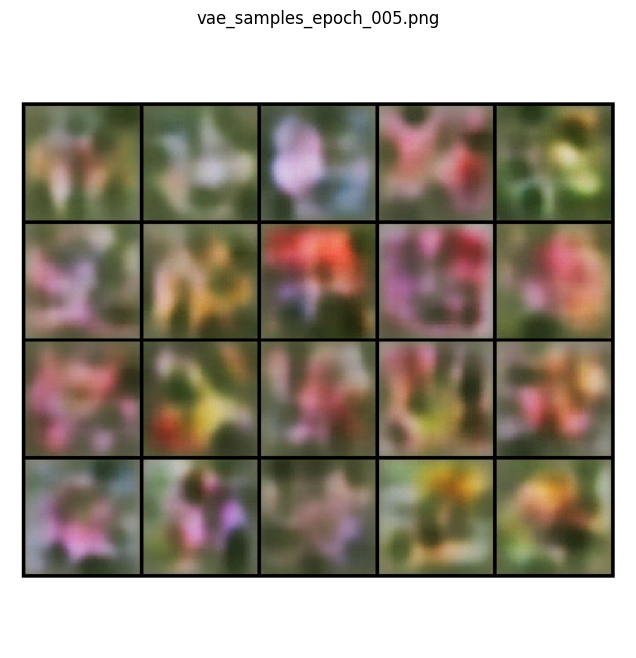

Epoch 6/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 7/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 8/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 9/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 10/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

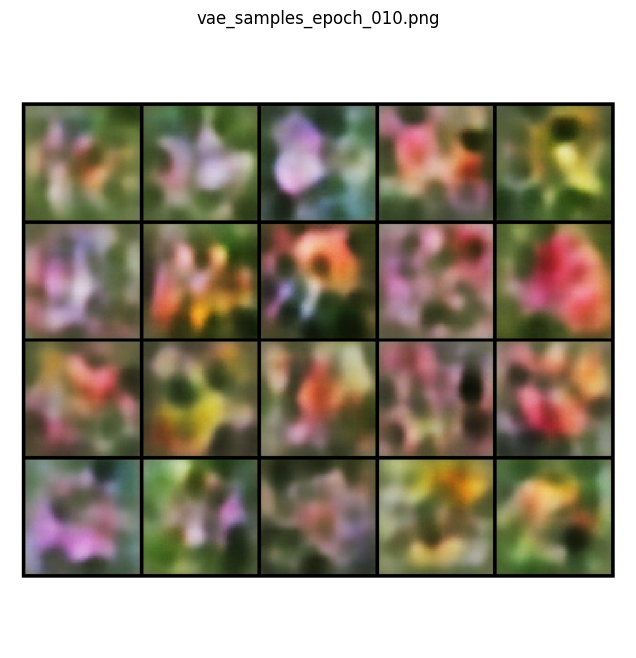

Epoch 11/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 12/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 13/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 14/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 15/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

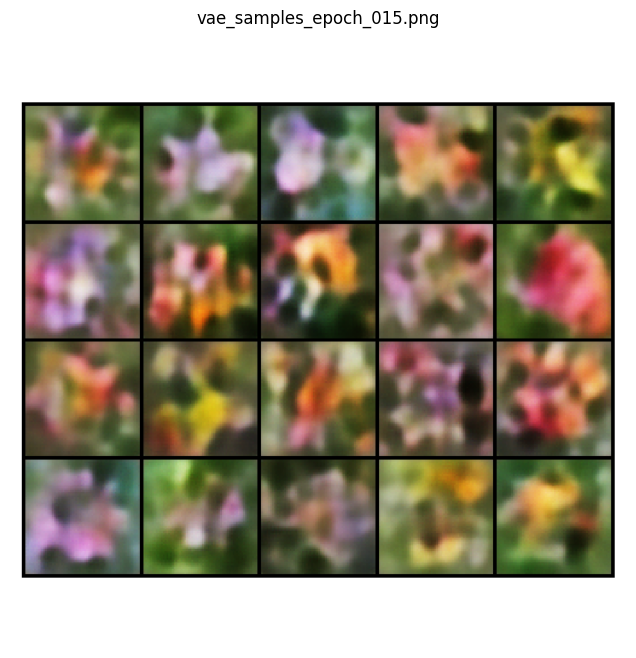

Epoch 16/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 17/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 18/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 19/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 20/20 (beta=1.000):   0%|          | 0/127 [00:00<?, ?it/s]

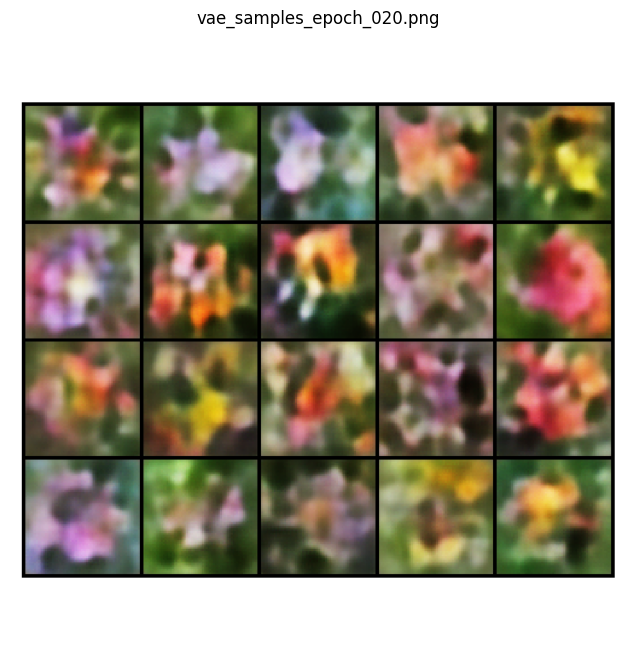

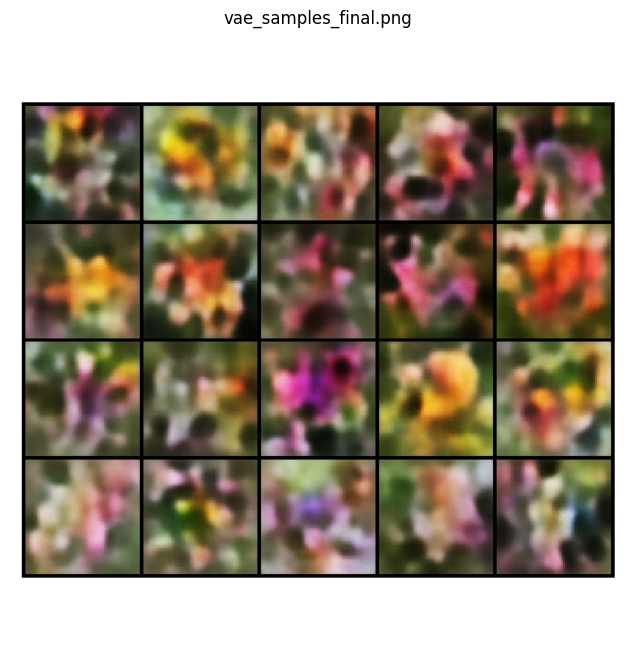

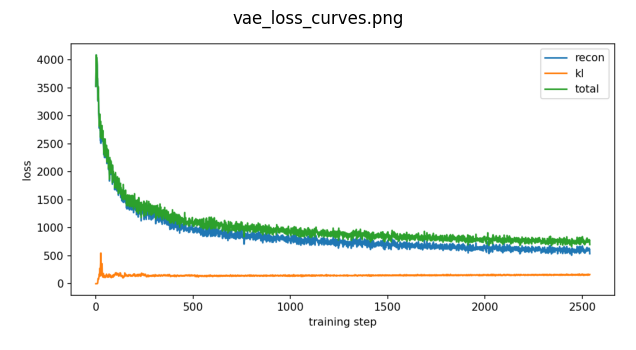

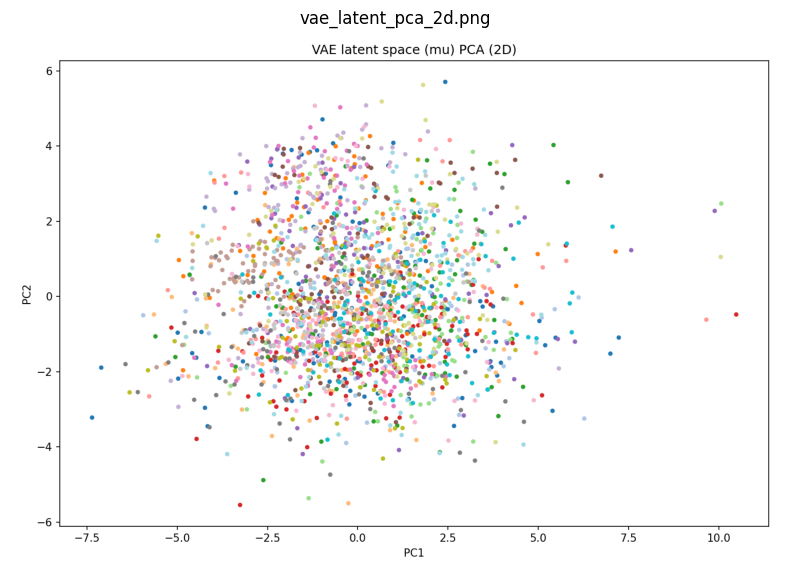

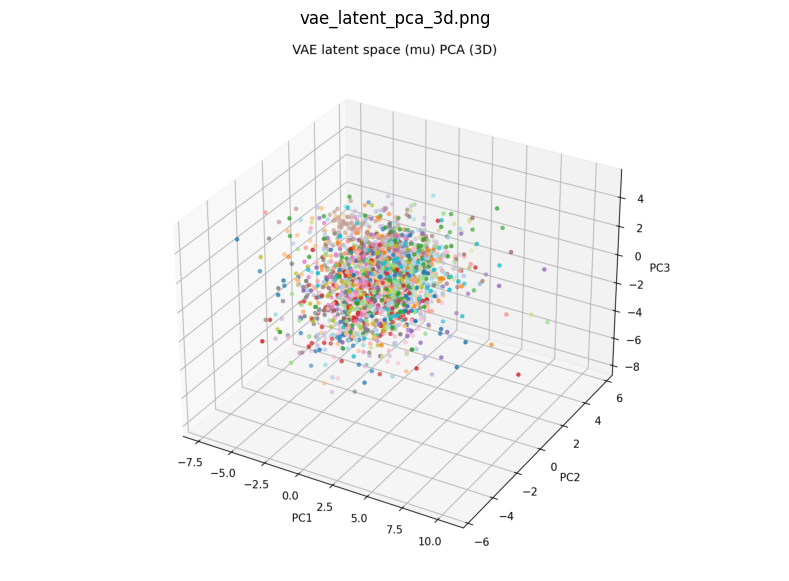

Saved model: ./vae_out/vae_model.pkl


In [1]:
# ============================================================
# VAE: TRAIN + SAVE PNGS + DISPLAY PNGS (ALL IN ONE SNIPPET)
# - Put this in ONE Jupyter cell and run
# - It will:
#   1) train the VAE
#   2) save samples + loss curves + latent plots to ./vae_out
#   3) DISPLAY the saved PNGs inline in the notebook
# ============================================================

import os
import json
import random
from dataclasses import dataclass
from typing import Dict, List, Tuple

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import tqdm

from torchvision import transforms, utils


# ----------------------------
# CONFIG
# ----------------------------

@dataclass
class Config:
    json_path: str = "category_to_images.json"
    image_root: str = "./jpg"
    out_dir: str = "./vae_out"

    seed: int = 42
    device: str = "cuda" if torch.cuda.is_available() else "cpu"

    img_size: int = 64
    batch_size: int = 64
    num_workers: int = 2

    z_dim: int = 128
    lr: float = 2e-4
    weight_decay: float = 0.0
    epochs: int = 20

    # If you want sharper: try beta_end=0.2
    beta_start: float = 0.0
    beta_end: float = 1.0
    beta_warmup_epochs: int = 5

    # Outputs
    n_sample_grid: int = 20
    grid_cols: int = 5
    save_every_epochs: int = 5

    # Latent vis requirement
    per_class_samples_for_latent: int = 20


# ----------------------------
# UTILS
# ----------------------------

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def ensure_dir(p: str):
    os.makedirs(p, exist_ok=True)

def save_grid_png(images01: torch.Tensor, path: str, nrow: int):
    grid = utils.make_grid(images01, nrow=nrow, normalize=False)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0).cpu())
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    plt.close()

def plot_loss_png(recon_hist, kl_hist, total_hist, path: str):
    plt.figure(figsize=(8, 4))
    plt.plot(recon_hist, label="recon")
    plt.plot(kl_hist, label="kl")
    plt.plot(total_hist, label="total")
    plt.legend()
    plt.xlabel("training step")
    plt.ylabel("loss")
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    plt.close()

def pca_project(X: np.ndarray, k: int):
    Xc = X - X.mean(axis=0, keepdims=True)
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
    return Xc @ Vt[:k].T

def beta_for_epoch(cfg: Config, epoch0: int) -> float:
    if cfg.beta_warmup_epochs <= 0:
        return cfg.beta_end
    t = min(1.0, (epoch0 + 1) / cfg.beta_warmup_epochs)
    return cfg.beta_start + t * (cfg.beta_end - cfg.beta_start)

def display_png(path: str, figsize=(10, 7)):
    if not os.path.exists(path):
        print("Missing:", path)
        return
    img = Image.open(path)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis("off")
    plt.show()


# ----------------------------
# DATASET
# ----------------------------

class Flowers102FromJSON(Dataset):
    def __init__(self, json_path: str, image_root: str, transform):
        with open(json_path, "r", encoding="utf-8") as f:
            mapping: Dict[str, List[str]] = json.load(f)

        items: List[Tuple[str, int]] = []
        for k, files in mapping.items():
            cls = int(k) - 1
            for fn in files:
                items.append((fn, cls))

        if not items:
            raise ValueError("No items found in JSON mapping.")

        self.items = items
        self.image_root = image_root
        self.transform = transform

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        fn, cls = self.items[idx]
        img = Image.open(os.path.join(self.image_root, fn)).convert("RGB")
        x = self.transform(img)
        return x, cls


# ----------------------------
# MODEL
# ----------------------------

class Encoder(nn.Module):
    def __init__(self, z_dim: int):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1), nn.ReLU(True),      # 64->32
            nn.Conv2d(64, 128, 4, 2, 1), nn.ReLU(True),    # 32->16
            nn.Conv2d(128, 256, 4, 2, 1), nn.ReLU(True),   # 16->8
            nn.Conv2d(256, 512, 4, 2, 1), nn.ReLU(True),   # 8->4
        )
        self.fc_mu = nn.Linear(512 * 4 * 4, z_dim)
        self.fc_logvar = nn.Linear(512 * 4 * 4, z_dim)

    def forward(self, x):
        h = self.conv(x).view(x.size(0), -1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar


class Decoder(nn.Module):
    def __init__(self, z_dim: int):
        super().__init__()
        self.fc = nn.Linear(z_dim, 512 * 4 * 4)
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 4, 2, 1), nn.ReLU(True),  # 4->8
            nn.ConvTranspose2d(256, 128, 4, 2, 1), nn.ReLU(True),  # 8->16
            nn.ConvTranspose2d(128, 64, 4, 2, 1), nn.ReLU(True),   # 16->32
            nn.ConvTranspose2d(64, 3, 4, 2, 1),                    # 32->64
            nn.Tanh(),  # output [-1,1]
        )

    def forward(self, z):
        h = self.fc(z).view(z.size(0), 512, 4, 4)
        return self.deconv(h)


class VAE(nn.Module):
    def __init__(self, z_dim: int):
        super().__init__()
        self.enc = Encoder(z_dim)
        self.dec = Decoder(z_dim)
        self.z_dim = z_dim

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.enc(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.dec(z)
        return x_hat, mu, logvar

    @torch.no_grad()
    def sample(self, n, device):
        z = torch.randn(n, self.z_dim, device=device)
        return self.dec(z)


def vae_loss(x, x_hat, mu, logvar, beta: float):
    recon = F.mse_loss(x_hat, x, reduction="sum") / x.size(0)
    kl = 0.5 * torch.sum(torch.exp(logvar) + mu**2 - 1.0 - logvar) / x.size(0)
    total = recon + beta * kl
    return total, recon, kl


# ----------------------------
# LATENT VIS (mu, PCA)
# ----------------------------

@torch.no_grad()
def save_latent_plots(cfg: Config, model: VAE, dataset: Flowers102FromJSON):
    model.eval()

    per_class = {c: [] for c in range(102)}
    for idx, (_fn, cls) in enumerate(dataset.items):
        if len(per_class[cls]) < cfg.per_class_samples_for_latent:
            per_class[cls].append(idx)

    selected = [(c, idxs) for c, idxs in per_class.items() if len(idxs) == cfg.per_class_samples_for_latent]
    if len(selected) == 0:
        print("No class has enough samples for latent visualization.")
        return

    X_mu = []
    Y = []

    for c, idxs in selected:
        for idx in idxs:
            x, _y = dataset[idx]
            x = x.unsqueeze(0).to(cfg.device)
            mu, _ = model.enc(x)
            X_mu.append(mu.squeeze(0).cpu().numpy())
            Y.append(c)

    X_mu = np.stack(X_mu, axis=0)
    Y = np.array(Y)

    Z2 = pca_project(X_mu, k=2)
    plt.figure(figsize=(10, 7))
    plt.scatter(Z2[:, 0], Z2[:, 1], s=10, c=Y, cmap="tab20")
    plt.title("VAE latent space (mu) PCA (2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.savefig(os.path.join(cfg.out_dir, "vae_latent_pca_2d.png"), dpi=150)
    plt.close()

    Z3 = pca_project(X_mu, k=3)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(Z3[:, 0], Z3[:, 1], Z3[:, 2], s=10, c=Y, cmap="tab20")
    ax.set_title("VAE latent space (mu) PCA (3D)")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.tight_layout()
    plt.savefig(os.path.join(cfg.out_dir, "vae_latent_pca_3d.png"), dpi=150)
    plt.close()


# ----------------------------
# TRAIN + SAVE + DISPLAY
# ----------------------------

def train_and_show(cfg: Config):
    set_seed(cfg.seed)
    ensure_dir(cfg.out_dir)

    # Normalize to [-1,1] because decoder uses Tanh
    transform = transforms.Compose([
        transforms.Resize((cfg.img_size, cfg.img_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,)*3, (0.5,)*3),
    ])

    ds = Flowers102FromJSON(cfg.json_path, cfg.image_root, transform)
    dl = DataLoader(
        ds,
        batch_size=cfg.batch_size,
        shuffle=True,
        num_workers=cfg.num_workers,
        drop_last=True,
        pin_memory=(cfg.device == "cuda"),
    )

    model = VAE(cfg.z_dim).to(cfg.device)
    opt = torch.optim.Adam(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)

    total_hist, recon_hist, kl_hist = [], [], []
    fixed_z = torch.randn(cfg.n_sample_grid, cfg.z_dim, device=cfg.device)

    step = 0
    for epoch in range(cfg.epochs):
        model.train()
        beta = beta_for_epoch(cfg, epoch)

        pbar = tqdm(dl, desc=f"Epoch {epoch+1}/{cfg.epochs} (beta={beta:.3f})")
        for x, _y in pbar:
            x = x.to(cfg.device, non_blocking=True)

            x_hat, mu, logvar = model(x)
            loss, recon, kl = vae_loss(x, x_hat, mu, logvar, beta=beta)

            opt.zero_grad(set_to_none=True)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            opt.step()

            total_hist.append(float(loss.item()))
            recon_hist.append(float(recon.item()))
            kl_hist.append(float(kl.item()))

            if step % 100 == 0:
                pbar.set_postfix({"total": f"{loss.item():.1f}", "recon": f"{recon.item():.1f}", "kl": f"{kl.item():.2f}"})
            step += 1

        # Save and DISPLAY every N epochs
        if (epoch + 1) % cfg.save_every_epochs == 0:
            model.eval()
            with torch.no_grad():
                samples = model.dec(fixed_z)
                samples01 = (samples + 1) / 2
            ep_path = os.path.join(cfg.out_dir, f"vae_samples_epoch_{epoch+1:03d}.png")
            save_grid_png(samples01, ep_path, nrow=cfg.grid_cols)
            display_png(ep_path, figsize=(8, 8))

    # Final samples
    model.eval()
    with torch.no_grad():
        final = model.sample(cfg.n_sample_grid, cfg.device)
        final01 = (final + 1) / 2
    final_path = os.path.join(cfg.out_dir, "vae_samples_final.png")
    save_grid_png(final01, final_path, nrow=cfg.grid_cols)
    display_png(final_path, figsize=(8, 8))

    # Loss curves
    loss_path = os.path.join(cfg.out_dir, "vae_loss_curves.png")
    plot_loss_png(recon_hist, kl_hist, total_hist, loss_path)
    display_png(loss_path, figsize=(10, 4))

    # Latent plots
    save_latent_plots(cfg, model, ds)
    display_png(os.path.join(cfg.out_dir, "vae_latent_pca_2d.png"), figsize=(10, 7))
    display_png(os.path.join(cfg.out_dir, "vae_latent_pca_3d.png"), figsize=(10, 7))

    # Save model
    torch.save(model.state_dict(), os.path.join(cfg.out_dir, "vae_model.pkl"))
    print("Saved model:", os.path.join(cfg.out_dir, "vae_model.pkl"))


# ----------------------------
# RUN
# ----------------------------

cfg = Config()
print("Config:", cfg)
print("Device:", cfg.device)
train_and_show(cfg)


In [2]:
%%writefile vae_train_and_save.py
import os
import json
import random
from dataclasses import dataclass
from typing import Dict, List, Tuple

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import tqdm

from torchvision import transforms, utils


@dataclass
class Config:
    json_path: str = "category_to_images.json"
    image_root: str = "./jpg"
    out_dir: str = "./vae_out"

    seed: int = 42
    device: str = "cuda" if torch.cuda.is_available() else "cpu"

    img_size: int = 64
    batch_size: int = 64
    num_workers: int = 2

    z_dim: int = 128
    lr: float = 2e-4
    weight_decay: float = 0.0
    epochs: int = 20

    # If you want sharper: try beta_end=0.2
    beta_start: float = 0.0
    beta_end: float = 1.0
    beta_warmup_epochs: int = 5

    # Outputs
    n_sample_grid: int = 20
    grid_cols: int = 5
    save_every_epochs: int = 5

    # Latent vis requirement
    per_class_samples_for_latent: int = 20


def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


def ensure_dir(p: str):
    os.makedirs(p, exist_ok=True)


def save_grid_png(images01: torch.Tensor, path: str, nrow: int):
    # images01: (N,3,H,W) in [0,1]
    grid = utils.make_grid(images01, nrow=nrow, normalize=False)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0).cpu())
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    plt.close()


def plot_loss_png(recon_hist, kl_hist, total_hist, path: str):
    plt.figure(figsize=(8, 4))
    plt.plot(recon_hist, label="recon")
    plt.plot(kl_hist, label="kl")
    plt.plot(total_hist, label="total")
    plt.legend()
    plt.xlabel("training step")
    plt.ylabel("loss")
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    plt.close()


def pca_project(X: np.ndarray, k: int):
    Xc = X - X.mean(axis=0, keepdims=True)
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
    return Xc @ Vt[:k].T


class Flowers102FromJSON(Dataset):
    def __init__(self, json_path: str, image_root: str, transform):
        with open(json_path, "r", encoding="utf-8") as f:
            mapping: Dict[str, List[str]] = json.load(f)

        items: List[Tuple[str, int]] = []
        for k, files in mapping.items():
            cls = int(k) - 1
            for fn in files:
                items.append((fn, cls))

        if not items:
            raise ValueError("No items found in JSON mapping.")

        self.items = items
        self.image_root = image_root
        self.transform = transform

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        fn, cls = self.items[idx]
        img = Image.open(os.path.join(self.image_root, fn)).convert("RGB")
        x = self.transform(img)
        return x, cls


class Encoder(nn.Module):
    def __init__(self, z_dim: int):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1), nn.ReLU(True),      # 64->32
            nn.Conv2d(64, 128, 4, 2, 1), nn.ReLU(True),    # 32->16
            nn.Conv2d(128, 256, 4, 2, 1), nn.ReLU(True),   # 16->8
            nn.Conv2d(256, 512, 4, 2, 1), nn.ReLU(True),   # 8->4
        )
        self.fc_mu = nn.Linear(512 * 4 * 4, z_dim)
        self.fc_logvar = nn.Linear(512 * 4 * 4, z_dim)

    def forward(self, x):
        h = self.conv(x).view(x.size(0), -1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar


class Decoder(nn.Module):
    def __init__(self, z_dim: int):
        super().__init__()
        self.fc = nn.Linear(z_dim, 512 * 4 * 4)
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 4, 2, 1), nn.ReLU(True),  # 4->8
            nn.ConvTranspose2d(256, 128, 4, 2, 1), nn.ReLU(True),  # 8->16
            nn.ConvTranspose2d(128, 64, 4, 2, 1), nn.ReLU(True),   # 16->32
            nn.ConvTranspose2d(64, 3, 4, 2, 1),                    # 32->64
            nn.Tanh(),
        )

    def forward(self, z):
        h = self.fc(z).view(z.size(0), 512, 4, 4)
        return self.deconv(h)


class VAE(nn.Module):
    def __init__(self, z_dim: int):
        super().__init__()
        self.enc = Encoder(z_dim)
        self.dec = Decoder(z_dim)
        self.z_dim = z_dim

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.enc(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.dec(z)
        return x_hat, mu, logvar

    @torch.no_grad()
    def sample(self, n, device):
        z = torch.randn(n, self.z_dim, device=device)
        return self.dec(z)


def vae_loss(x, x_hat, mu, logvar, beta: float):
    recon = F.mse_loss(x_hat, x, reduction="sum") / x.size(0)
    kl = 0.5 * torch.sum(torch.exp(logvar) + mu**2 - 1.0 - logvar) / x.size(0)
    total = recon + beta * kl
    return total, recon, kl


def beta_for_epoch(cfg: Config, epoch0: int) -> float:
    if cfg.beta_warmup_epochs <= 0:
        return cfg.beta_end
    t = min(1.0, (epoch0 + 1) / cfg.beta_warmup_epochs)
    return cfg.beta_start + t * (cfg.beta_end - cfg.beta_start)


@torch.no_grad()
def save_latent_plots(cfg: Config, model: VAE, dataset: Flowers102FromJSON):
    model.eval()

    per_class = {c: [] for c in range(102)}
    for idx, (_fn, cls) in enumerate(dataset.items):
        if len(per_class[cls]) < cfg.per_class_samples_for_latent:
            per_class[cls].append(idx)

    selected = [(c, idxs) for c, idxs in per_class.items() if len(idxs) == cfg.per_class_samples_for_latent]
    if len(selected) == 0:
        print("No class has enough samples for latent visualization.")
        return

    X_mu = []
    Y = []
    for c, idxs in selected:
        for idx in idxs:
            x, y = dataset[idx]
            x = x.unsqueeze(0).to(cfg.device)
            mu, _ = model.enc(x)
            X_mu.append(mu.squeeze(0).cpu().numpy())
            Y.append(c)

    X_mu = np.stack(X_mu, axis=0)
    Y = np.array(Y)

    Z2 = pca_project(X_mu, k=2)
    plt.figure(figsize=(10, 7))
    plt.scatter(Z2[:, 0], Z2[:, 1], s=10, c=Y, cmap="tab20")
    plt.title("VAE latent space (mu) PCA (2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.savefig(os.path.join(cfg.out_dir, "vae_latent_pca_2d.png"), dpi=150)
    plt.close()

    Z3 = pca_project(X_mu, k=3)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(Z3[:, 0], Z3[:, 1], Z3[:, 2], s=10, c=Y, cmap="tab20")
    ax.set_title("VAE latent space (mu) PCA (3D)")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.tight_layout()
    plt.savefig(os.path.join(cfg.out_dir, "vae_latent_pca_3d.png"), dpi=150)
    plt.close()


def train(cfg: Config):
    set_seed(cfg.seed)
    ensure_dir(cfg.out_dir)

    # [-1,1] because decoder uses Tanh
    transform = transforms.Compose([
        transforms.Resize((cfg.img_size, cfg.img_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,)*3, (0.5,)*3),
    ])

    ds = Flowers102FromJSON(cfg.json_path, cfg.image_root, transform)
    dl = DataLoader(
        ds,
        batch_size=cfg.batch_size,
        shuffle=True,
        num_workers=cfg.num_workers,
        drop_last=True,
        pin_memory=(cfg.device == "cuda"),
    )

    model = VAE(cfg.z_dim).to(cfg.device)
    opt = torch.optim.Adam(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)

    total_hist, recon_hist, kl_hist = [], [], []
    fixed_z = torch.randn(cfg.n_sample_grid, cfg.z_dim, device=cfg.device)

    step = 0
    for epoch in range(cfg.epochs):
        model.train()
        beta = beta_for_epoch(cfg, epoch)

        pbar = tqdm(dl, desc=f"Epoch {epoch+1}/{cfg.epochs} (beta={beta:.3f})")
        for x, _y in pbar:
            x = x.to(cfg.device, non_blocking=True)

            x_hat, mu, logvar = model(x)
            loss, recon, kl = vae_loss(x, x_hat, mu, logvar, beta=beta)

            opt.zero_grad(set_to_none=True)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            opt.step()

            total_hist.append(float(loss.item()))
            recon_hist.append(float(recon.item()))
            kl_hist.append(float(kl.item()))

            if step % 100 == 0:
                pbar.set_postfix({"total": f"{loss.item():.1f}", "recon": f"{recon.item():.1f}", "kl": f"{kl.item():.2f}"})
            step += 1

        # save samples every N epochs
        if (epoch + 1) % cfg.save_every_epochs == 0:
            model.eval()
            with torch.no_grad():
                samples = model.dec(fixed_z)
                samples01 = (samples + 1) / 2  # [-1,1] -> [0,1]
            save_grid_png(samples01, os.path.join(cfg.out_dir, f"vae_samples_epoch_{epoch+1:03d}.png"), nrow=cfg.grid_cols)
            print(f"Saved: {os.path.join(cfg.out_dir, f'vae_samples_epoch_{epoch+1:03d}.png')}")

    # final samples
    model.eval()
    with torch.no_grad():
        final = model.sample(cfg.n_sample_grid, cfg.device)
        final01 = (final + 1) / 2
    save_grid_png(final01, os.path.join(cfg.out_dir, "vae_samples_final.png"), nrow=cfg.grid_cols)
    print(f"Saved: {os.path.join(cfg.out_dir, 'vae_samples_final.png')}")

    # loss curves
    plot_loss_png(recon_hist, kl_hist, total_hist, os.path.join(cfg.out_dir, "vae_loss_curves.png"))
    print(f"Saved: {os.path.join(cfg.out_dir, 'vae_loss_curves.png')}")

    # latent plots
    save_latent_plots(cfg, model, ds)
    print(f"Saved: {os.path.join(cfg.out_dir, 'vae_latent_pca_2d.png')}")
    print(f"Saved: {os.path.join(cfg.out_dir, 'vae_latent_pca_3d.png')}")

    # model
    torch.save(model.state_dict(), os.path.join(cfg.out_dir, "vae_model.pkl"))
    print(f"Saved: {os.path.join(cfg.out_dir, 'vae_model.pkl')}")


if __name__ == "__main__":
    cfg = Config()
    print("Config:", cfg)
    print("Device:", cfg.device)
    train(cfg)


Writing vae_train_and_save.py


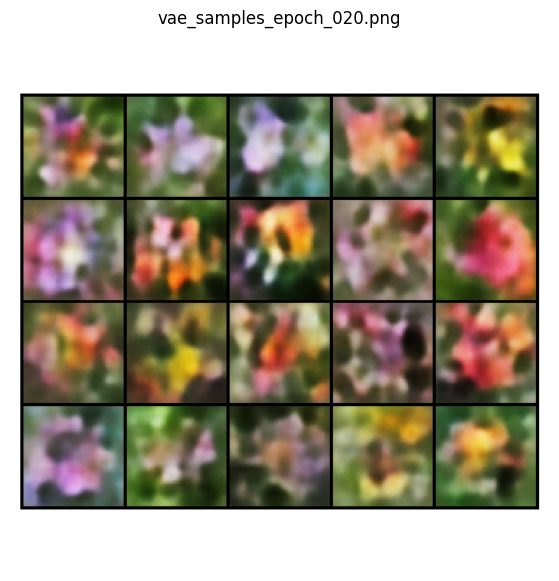

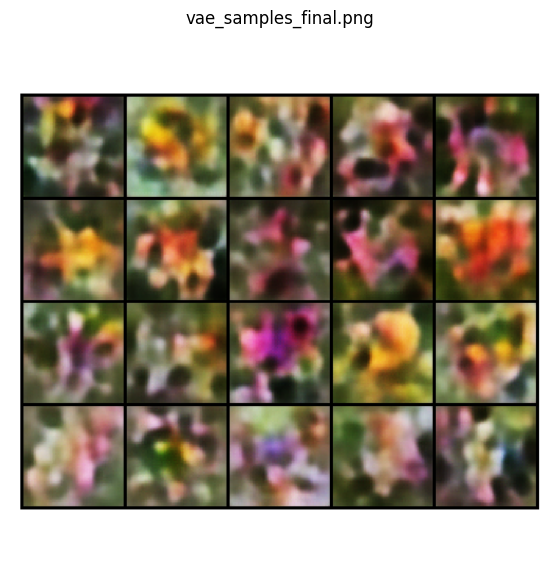

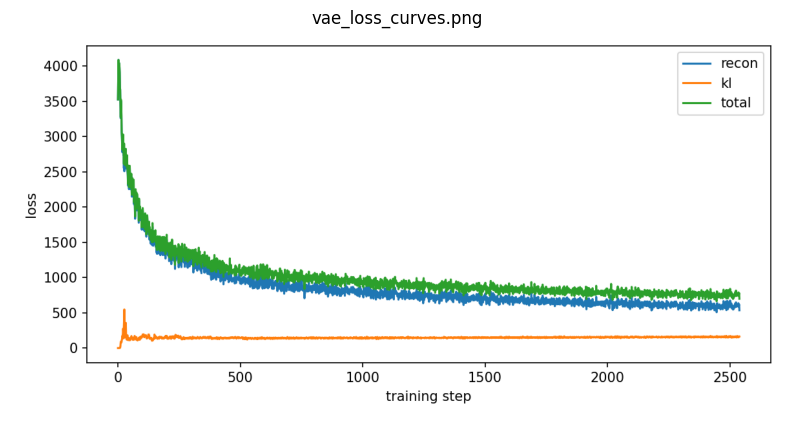

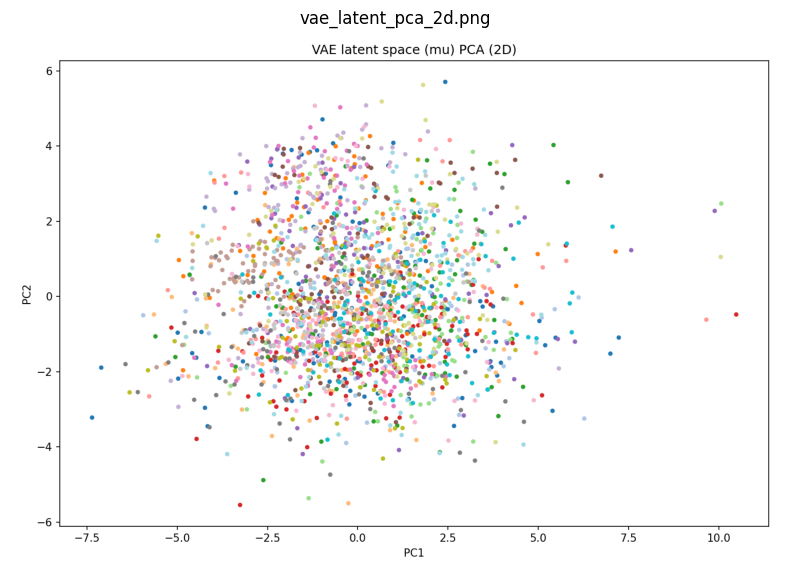

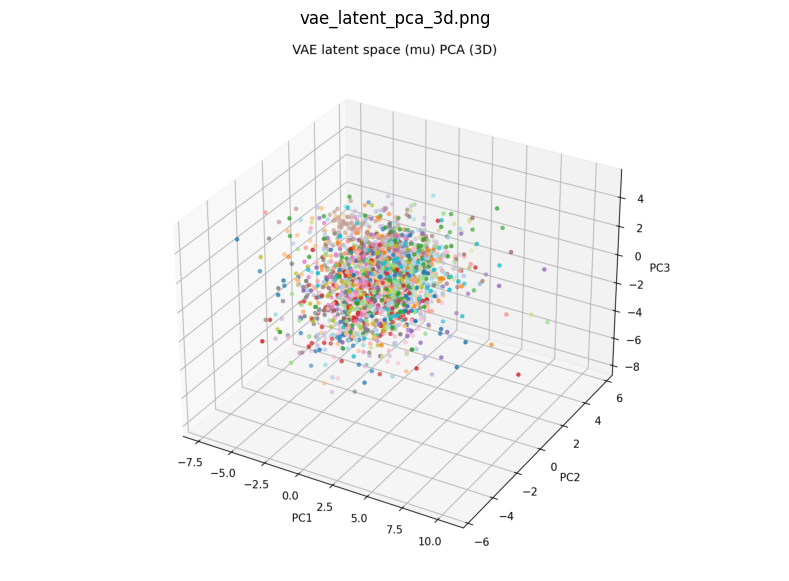

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os

OUT_DIR = "./vae_out"

# show latest epoch sample, final, losses, PCA 2D/3D
paths = []

epoch_samples = sorted(glob.glob(os.path.join(OUT_DIR, "vae_samples_epoch_*.png")))
if epoch_samples:
    paths.append(epoch_samples[-1])

paths += [
    os.path.join(OUT_DIR, "vae_samples_final.png"),
    os.path.join(OUT_DIR, "vae_loss_curves.png"),
    os.path.join(OUT_DIR, "vae_latent_pca_2d.png"),
    os.path.join(OUT_DIR, "vae_latent_pca_3d.png"),
]

for p in paths:
    if not os.path.exists(p):
        print("Missing:", p)
        continue
    img = Image.open(p)
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    plt.title(os.path.basename(p))
    plt.axis("off")
    plt.show()


for comparrision training a gan model as well


In [4]:
%%writefile gan_train.py
import os
import json
import random
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from PIL import Image

import torchvision
from torchvision import transforms
from tqdm.auto import tqdm


# ============================================================
# CONFIG
# ============================================================

@dataclass
class Config:
    # data
    json_path: str = "category_to_images.json"
    image_root: str = "./jpg"
    img_size: int = 64

    # output
    out_dir: str = "./gan_out"
    grid_cols: int = 5
    n_sample_grid: int = 20

    # training
    seed: int = 42
    device: str = "cuda" if torch.cuda.is_available() else "cpu"
    batch_size: int = 128
    num_workers: int = 2
    epochs: int = 40

    # GAN
    z_dim: int = 128
    lrG: float = 2e-4
    lrD: float = 2e-4
    betas: Tuple[float, float] = (0.5, 0.999)
    real_label: float = 0.9  # one-sided label smoothing

    # stability knobs
    use_instance_noise: bool = True
    noise_std_start: float = 0.08
    noise_std_end: float = 0.0

    # logging
    tqdm_update_every: int = 20
    sample_every_epochs: int = 1
    show_every_epochs: int = 1  # set to 0 to never plt.show()


# ============================================================
# UTIL
# ============================================================

def set_seed(seed: int) -> None:
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def ensure_dir(p: str) -> None:
    os.makedirs(p, exist_ok=True)

def linear_schedule(epoch_idx: int, total_epochs: int, start: float, end: float) -> float:
    if total_epochs <= 1:
        return end
    t = epoch_idx / (total_epochs - 1)
    return (1 - t) * start + t * end

def save_and_maybe_show_grid(images_01: torch.Tensor, out_path: str, title: str, grid_cols: int, show: bool):
    """
    images_01: (N,3,H,W) in [0,1]
    """
    images_01 = images_01.detach().cpu().clamp(0, 1)
    grid = torchvision.utils.make_grid(images_01, nrow=grid_cols, padding=2, normalize=False)
    grid_np = grid.permute(1, 2, 0).numpy()

    plt.figure(figsize=(grid_cols * 2.2, int(np.ceil(images_01.size(0) / grid_cols)) * 2.2))
    plt.imshow(grid_np)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    if show:
        plt.show()
    plt.close()

def plot_loss_curves(D_losses: List[float], G_losses: List[float], out_path: str, show: bool):
    steps = list(range(len(D_losses)))
    plt.figure()
    plt.plot(steps, D_losses, label="D loss")
    plt.plot(steps, G_losses, label="G loss")
    plt.xlabel("training step")
    plt.ylabel("loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    if show:
        plt.show()
    plt.close()


# ============================================================
# DATASET (from JSON mapping)
# ============================================================

class Flowers102FromJSON(Dataset):
    def __init__(self, json_path: str, image_root: str, transform):
        self.image_root = image_root
        self.transform = transform

        with open(json_path, "r", encoding="utf-8") as f:
            mapping: Dict[str, List[str]] = json.load(f)

        items: List[Tuple[str, int]] = []
        for k, files in mapping.items():
            cls = int(k) - 1
            for fn in files:
                items.append((fn, cls))

        if not items:
            raise ValueError("No images found in JSON mapping.")
        self.items = items

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        fn, cls = self.items[idx]
        path = os.path.join(self.image_root, fn)
        img = Image.open(path).convert("RGB")
        x = self.transform(img)  # normalized to [-1,1]
        return x, cls


# ============================================================
# MODEL (DCGAN-ish)
# ============================================================

def weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.Linear)):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        if getattr(m, "bias", None) is not None and m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0.0)
    elif isinstance(m, nn.BatchNorm1d):
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0.0)

class Generator(nn.Module):
    def __init__(self, z_dim: int):
        super().__init__()
        self.z_dim = z_dim
        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            # extra refinement layer idea (helps slightly sometimes)
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh(),  # output in [-1,1]
        )

    def forward(self, z: torch.Tensor) -> torch.Tensor:
        z = z.view(z.size(0), self.z_dim, 1, 1)
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            # NOTE: no Sigmoid here (we use BCEWithLogitsLoss)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x).view(-1)


# ============================================================
# VIS / SAMPLING (from the other notebook ideas)
# ============================================================

@torch.no_grad()
def show_generated_images(epoch: int, G: nn.Module, z_dim: int, device: str, out_dir: str, n_images: int, grid_cols: int, show: bool):
    G.eval()
    z = torch.randn(n_images, z_dim, device=device)
    fake = G(z)  # [-1,1]
    fake_01 = (fake + 1.0) / 2.0
    out_path = os.path.join(out_dir, f"samples_epoch_{epoch:03d}.png")
    save_and_maybe_show_grid(fake_01, out_path, f"Generated samples (epoch {epoch})", grid_cols, show)

@torch.no_grad()
def interpolate_and_generate(G: nn.Module, z_dim: int, device: str, out_path: str, num_steps: int = 10, show: bool = True):
    """
    Interpolate between two random z vectors and visualize the morphing.
    (Idea appears in the provided notebook.) :contentReference[oaicite:3]{index=3}
    """
    G.eval()
    z1 = torch.randn(1, z_dim, device=device)
    z2 = torch.randn(1, z_dim, device=device)
    alphas = np.linspace(0, 1, num_steps)

    imgs = []
    for a in alphas:
        z = a * z1 + (1.0 - a) * z2
        x = G(z).squeeze(0)          # (3,H,W) in [-1,1]
        x = (x + 1.0) / 2.0
        imgs.append(x.detach().cpu())

    fig, axes = plt.subplots(1, num_steps, figsize=(num_steps * 2.2, 2.2))
    for i in range(num_steps):
        axes[i].imshow(imgs[i].permute(1, 2, 0).clamp(0, 1).numpy())
        axes[i].axis("off")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    if show:
        plt.show()
    plt.close()


# ============================================================
# TRAIN
# ============================================================

def train(cfg: Config):
    set_seed(cfg.seed)
    ensure_dir(cfg.out_dir)

    # Normalize to [-1,1] exactly like the other notebook suggestion :contentReference[oaicite:4]{index=4}
    transform = transforms.Compose([
        transforms.Resize((cfg.img_size, cfg.img_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # -> [-1,1]
    ])

    ds = Flowers102FromJSON(cfg.json_path, cfg.image_root, transform=transform)
    dl = DataLoader(
        ds,
        batch_size=cfg.batch_size,
        shuffle=True,
        num_workers=cfg.num_workers,
        drop_last=True,
        pin_memory=(cfg.device == "cuda"),
    )

    G = Generator(cfg.z_dim).to(cfg.device)
    D = Discriminator().to(cfg.device)
    G.apply(weights_init)
    D.apply(weights_init)

    optG = torch.optim.Adam(G.parameters(), lr=cfg.lrG, betas=cfg.betas)
    optD = torch.optim.Adam(D.parameters(), lr=cfg.lrD, betas=cfg.betas)

    # more stable than Sigmoid + BCELoss
    bce_logits = nn.BCEWithLogitsLoss()

    D_losses: List[float] = []
    G_losses: List[float] = []

    fixed_z = torch.randn(cfg.n_sample_grid, cfg.z_dim, device=cfg.device)

    step = 0
    for epoch in range(cfg.epochs):
        G.train()
        D.train()

        # instance noise schedule (high early, goes to 0)
        noise_std = linear_schedule(epoch, cfg.epochs, cfg.noise_std_start, cfg.noise_std_end)

        pbar = tqdm(dl, desc=f"Epoch {epoch+1}/{cfg.epochs}", leave=True)
        lossD_running = 0.0
        lossG_running = 0.0

        for i, (real, _y) in enumerate(pbar):
            real = real.to(cfg.device, non_blocking=True)
            B = real.size(0)

            if cfg.use_instance_noise and noise_std > 0:
                real_in = real + noise_std * torch.randn_like(real)
            else:
                real_in = real

            # -----------------------------------
            # Train D
            # -----------------------------------
            D.zero_grad(set_to_none=True)

            real_targets = torch.full((B,), cfg.real_label, device=cfg.device)  # 0.9
            fake_targets = torch.zeros(B, device=cfg.device)

            real_logits = D(real_in)
            lossD_real = bce_logits(real_logits, real_targets)

            z = torch.randn(B, cfg.z_dim, device=cfg.device)
            fake = G(z).detach()
            if cfg.use_instance_noise and noise_std > 0:
                fake_in = fake + noise_std * torch.randn_like(fake)
            else:
                fake_in = fake

            fake_logits = D(fake_in)
            lossD_fake = bce_logits(fake_logits, fake_targets)

            lossD = lossD_real + lossD_fake
            lossD.backward()
            optD.step()

            # -----------------------------------
            # Train G
            # -----------------------------------
            G.zero_grad(set_to_none=True)

            z = torch.randn(B, cfg.z_dim, device=cfg.device)
            gen = G(z)
            if cfg.use_instance_noise and noise_std > 0:
                gen_in = gen + noise_std * torch.randn_like(gen)
            else:
                gen_in = gen

            gen_logits = D(gen_in)
            # want D(gen) to be "real"
            lossG = bce_logits(gen_logits, torch.ones(B, device=cfg.device))
            lossG.backward()
            optG.step()

            D_losses.append(float(lossD.item()))
            G_losses.append(float(lossG.item()))

            lossD_running += float(lossD.item())
            lossG_running += float(lossG.item())

            if (i % cfg.tqdm_update_every) == 0:
                with torch.no_grad():
                    D_real_prob = torch.sigmoid(real_logits).mean().item()
                    D_fake_prob = torch.sigmoid(fake_logits).mean().item()
                pbar.set_postfix({
                    "lossD": f"{lossD_running/(i+1):.3f}",
                    "lossG": f"{lossG_running/(i+1):.3f}",
                    "D(real)": f"{D_real_prob:.2f}",
                    "D(fake)": f"{D_fake_prob:.2f}",
                    "noise": f"{noise_std:.3f}",
                })

            step += 1

        # -----------------------------------
        # Samples each epoch (fixed z)
        # -----------------------------------
        if cfg.sample_every_epochs and ((epoch + 1) % cfg.sample_every_epochs == 0):
            G.eval()
            with torch.no_grad():
                fake_fixed = G(fixed_z)            # [-1,1]
                fake_fixed_01 = (fake_fixed + 1.0) / 2.0

            out_path = os.path.join(cfg.out_dir, f"samples_epoch_{epoch+1:03d}.png")
            show_now = (cfg.show_every_epochs and ((epoch + 1) % cfg.show_every_epochs == 0))
            save_and_maybe_show_grid(
                fake_fixed_01,
                out_path,
                title=f"Generated samples (epoch {epoch+1})",
                grid_cols=cfg.grid_cols,
                show=show_now,
            )

    # -----------------------------------
    # Save weights
    # -----------------------------------
    torch.save(G.state_dict(), os.path.join(cfg.out_dir, "gan_G.pkl"))
    torch.save(D.state_dict(), os.path.join(cfg.out_dir, "gan_D.pkl"))
    print(f"Saved: {os.path.join(cfg.out_dir, 'gan_G.pkl')}")
    print(f"Saved: {os.path.join(cfg.out_dir, 'gan_D.pkl')}")

    # -----------------------------------
    # Plot losses (and show)
    # -----------------------------------
    loss_plot_path = os.path.join(cfg.out_dir, "gan_loss_curves.png")
    plot_loss_curves(D_losses, G_losses, loss_plot_path, show=True)
    print(f"Saved: {loss_plot_path}")

    # -----------------------------------
    # Final samples (and show)
    # -----------------------------------
    G.eval()
    with torch.no_grad():
        z = torch.randn(cfg.n_sample_grid, cfg.z_dim, device=cfg.device)
        final = G(z)
        final_01 = (final + 1.0) / 2.0

    final_path = os.path.join(cfg.out_dir, "gan_generated_samples.png")
    save_and_maybe_show_grid(final_01, final_path, "GAN generated samples (final)", cfg.grid_cols, show=True)
    print(f"Saved: {final_path}")

    # -----------------------------------
    # Latent interpolation (and show)
    # -----------------------------------
    interp_path = os.path.join(cfg.out_dir, "gan_latent_interpolation.png")
    interpolate_and_generate(G, cfg.z_dim, cfg.device, interp_path, num_steps=10, show=True)
    print(f"Saved: {interp_path}")


if __name__ == "__main__":
    cfg = Config()
    print("Config:", cfg)
    print("Device:", cfg.device)
    train(cfg)


Overwriting gan_train.py


In [5]:
import gan_train as gan_train_module
gan_train_module.train(gan_train_module.Config())


Config: Config(json_path='category_to_images.json', image_root='./jpg', out_dir='./gan_out', seed=42, device='cuda', img_size=64, batch_size=128, num_workers=2, z_dim=128, lrG=0.0002, lrD=0.0002, betas=(0.5, 0.999), epochs=40, n_sample_grid=20, grid_cols=5, real_label=0.9, show_every_epochs=5)
Epoch 1/40:  94%|█████████████████████████████  | 59/63 [00:43<00:02,  1.43it/s]

Epoch 5/40: 100%|███████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]
Figure(800x800)
Epoch 10/40: 100%|██████████████████████████████| 63/63 [00:44<00:00,  1.41it/s]
Figure(800x800)
Epoch 15/40: 100%|██████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]
Figure(800x800)
Epoch 20/40: 100%|██████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]
Figure(800x800)
Epoch 25/40: 100%|██████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]
Figure(800x800)
Epoch 30/40: 100%|██████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]
Figure(800x800)
Epoch 35/40: 100%|██████████████████████████████| 63/63 [00:44<00:00,  1.42it/s]
Figure(800x800)
Epoch 40/40: 100%|██████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]
Figure(800x800)
Figure(800x800)
Figure(600x400)
